# Heart Diseases Prediction

In [1]:
'''
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
'''

'\nCardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.\nHeart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.\nMost cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.\nPeople with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.\n'

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the dataset
heart_data = pd.read_csv("heart.csv")
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
heart_data.shape

(918, 12)

In [5]:
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
list(heart_data.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [8]:
features = ['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [9]:
for feature in features:
    if heart_data[feature].dtype == "object":
        print(f"{feature}: ",heart_data[feature].unique())

Sex:  ['M' 'F']
ChestPainType:  ['ATA' 'NAP' 'ASY' 'TA']
RestingECG:  ['Normal' 'ST' 'LVH']
ExerciseAngina:  ['N' 'Y']
ST_Slope:  ['Up' 'Flat' 'Down']


In [10]:
heart_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [12]:
# List of categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [13]:
for feature in categorical_features:
    heart_data[feature] = label_encoder.fit_transform(heart_data[feature])

In [14]:
for feature in categorical_features:
    print(f"{feature}: ",heart_data[feature].unique())

Sex:  [1 0]
ChestPainType:  [1 2 0 3]
RestingECG:  [1 2 0]
ExerciseAngina:  [0 1]
ST_Slope:  [2 1 0]


                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000  0.055750      -0.077150   0.254399    -0.095282   
Sex             0.055750  1.000000      -0.126559   0.005133    -0.200092   
ChestPainType  -0.077150 -0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399  0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282 -0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039  0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484  0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045 -0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793  0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612  0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264 -0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039  0.305445      -0.386828   0.107589    -0.232741   

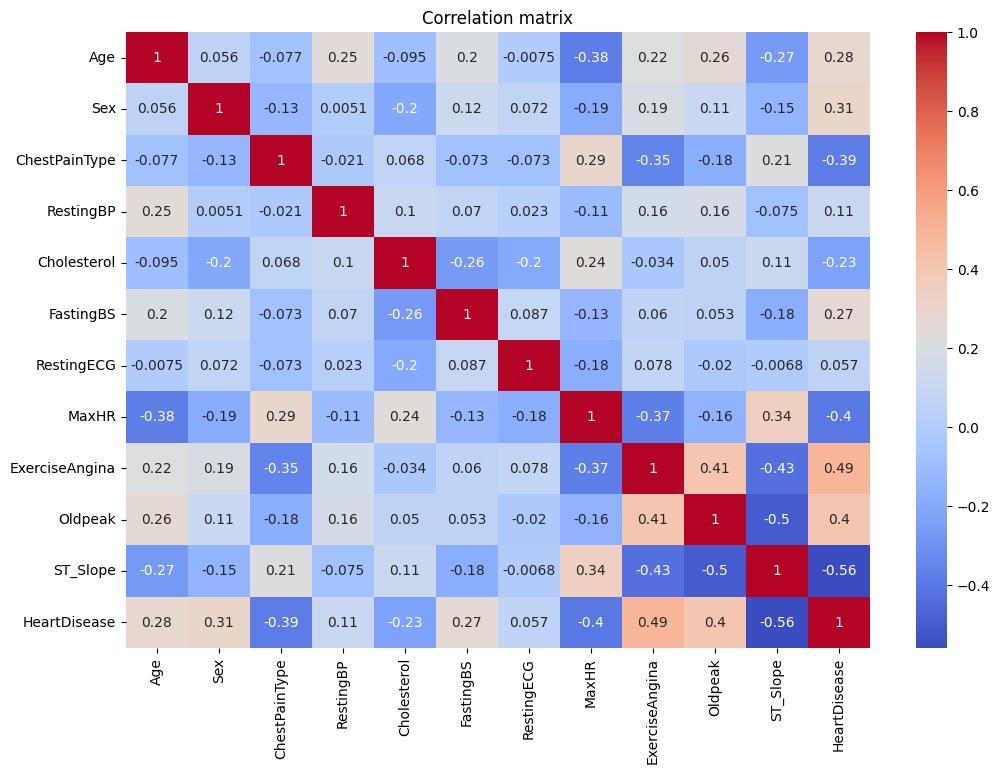

In [15]:
correlation_matrix = heart_data.corr()

print(correlation_matrix)

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

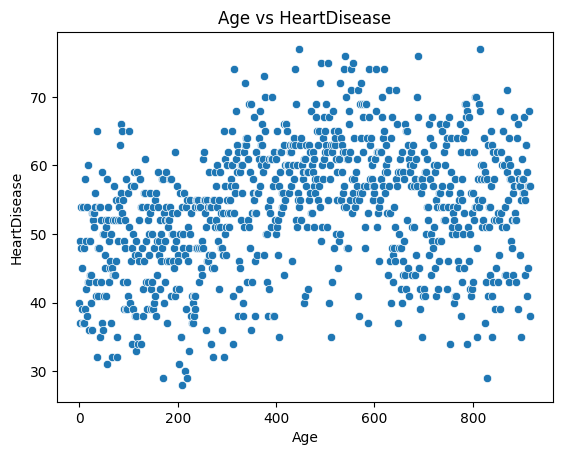

In [16]:
sns.scatterplot(heart_data['Age'])
plt.title("Age vs HeartDisease")
plt.xlabel("Age")
plt.ylabel("HeartDisease")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24044\1139594766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_data['ExerciseAngina'])


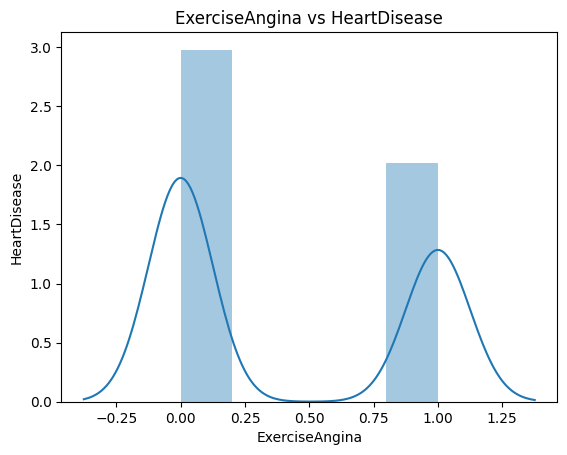

In [17]:
sns.distplot(heart_data['ExerciseAngina'])
plt.title("ExerciseAngina vs HeartDisease")
plt.xlabel("ExerciseAngina")
plt.ylabel("HeartDisease")
plt.show()

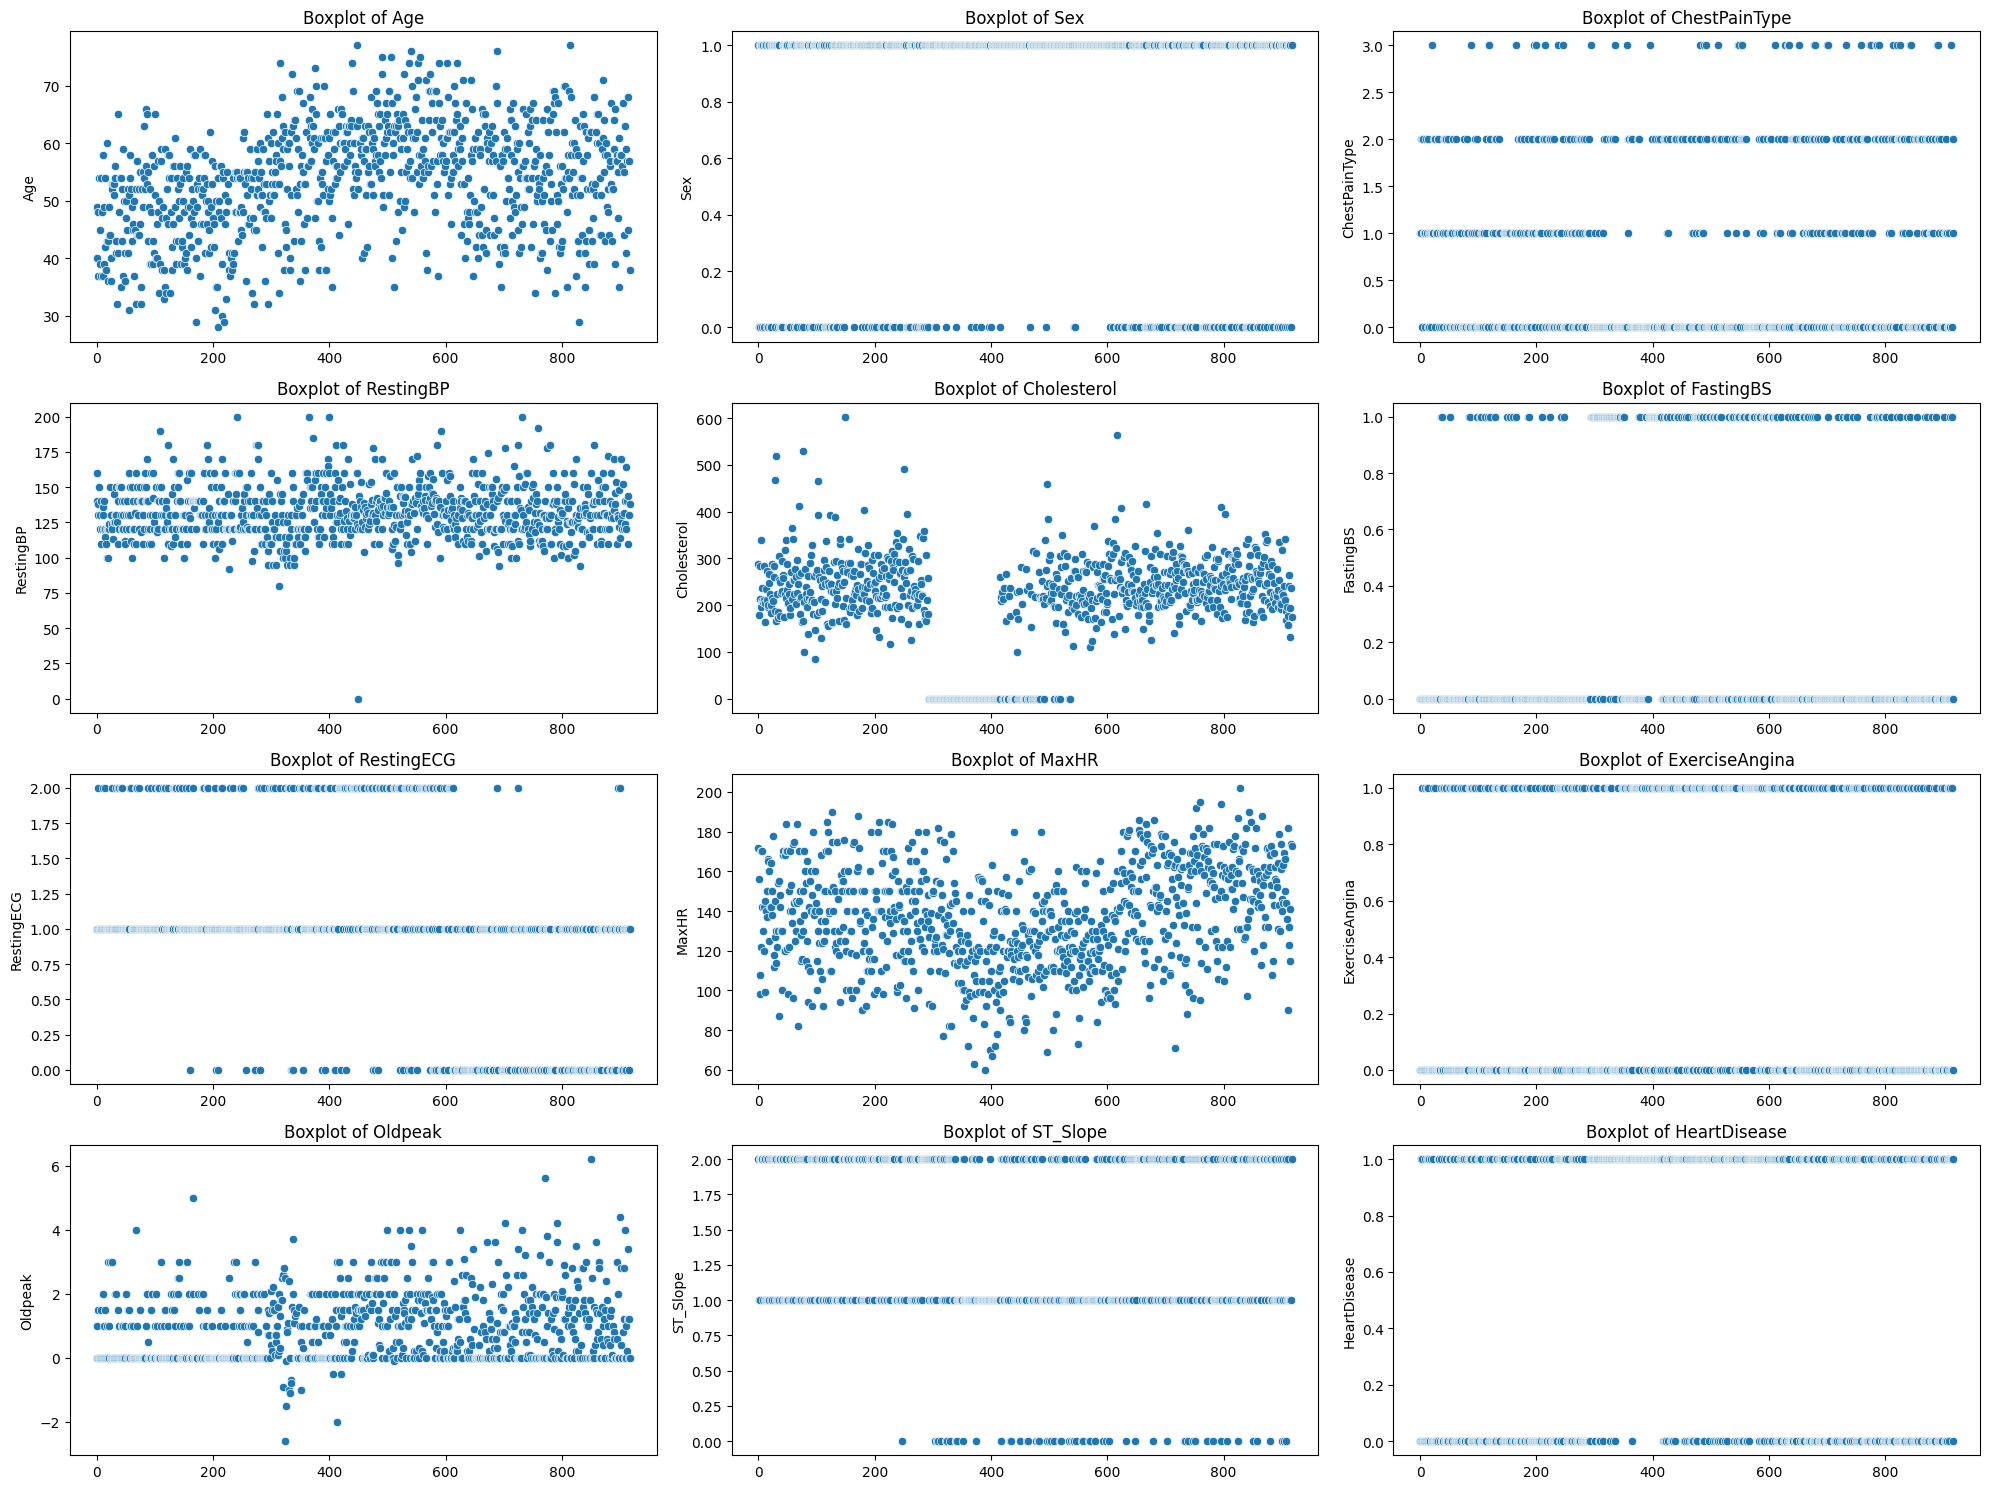

In [18]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(heart_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()

In [19]:
heart_data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [20]:
# 1 --> Defective heart
# 0 --> Healthy heart

In [21]:
from sklearn.model_selection import train_test_split , GridSearchCV

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [22]:
X = heart_data.drop("HeartDisease", axis=1)
y = heart_data['HeartDisease']

In [23]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
lr_model_pred = lr_model.predict(X_test)
lr_model_prob = lr_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

In [30]:
print(f"LogisticRegression Performance: \n")
print("accuracy score: ", accuracy_score(y_test,lr_model_pred).4f)
print("ROC-AUC: ", roc_auc_score(y_test,lr_model_prob))

LogisticRegression Performance: 

accuracy score:  0.8478260869565217
ROC-AUC:  0.9008374802767326


Confusion Matrix:
[[68  9]
 [19 88]]


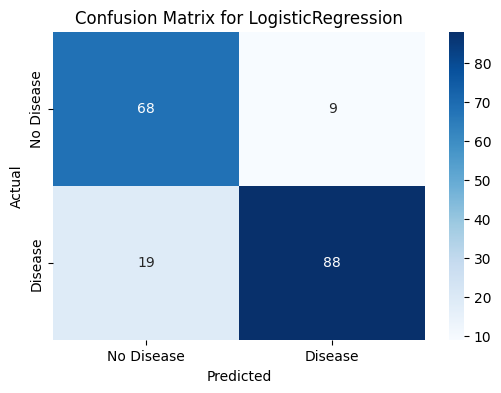

In [31]:
# Compute and print confusion matrix
cm = confusion_matrix(y_test, lr_model_pred)
print(f"Confusion Matrix:\n{cm}")
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for LogisticRegression')
plt.show()

In [32]:
#supprot vector machine
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [33]:
#RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
#GradientBoosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [35]:
#XGBoot
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
svc_model_pred = svc_model.predict(X_test)
svc_model_prob = svc_model.predict_proba(X_test)[:, 1]

In [40]:
print("SVC Performance:")
print("accuracy score: ", accuracy_score(y_test,svc_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,svc_model_prob))

SVC Performance:
accuracy score:  0.8641304347826086
ROC-AUC:  0.9492656875834445


Confusion Matrix:
[[66 11]
 [14 93]]


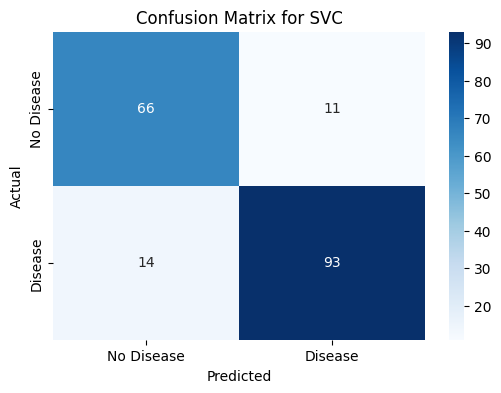

In [41]:
# Compute and print confusion matrix
cm = confusion_matrix(y_test, svc_model_pred)
print(f"Confusion Matrix:\n{cm}")
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for SVC')
plt.show()

In [43]:
rf_model_pred = rf_model.predict(X_test)
rf_model_prob = rf_model.predict_proba(X_test)[:, 1]

In [44]:
print("random forest Performance:")
print("accuracy score: ", accuracy_score(y_test,rf_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,rf_model_prob))

random forest Performance:
accuracy score:  0.8804347826086957
ROC-AUC:  0.9370069183153295


Confusion Matrix:
[[68  9]
 [13 94]]


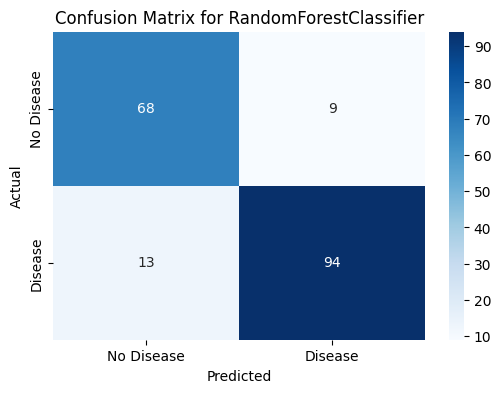

In [45]:
# Compute and print confusion matrix
cm = confusion_matrix(y_test, rf_model_pred)
print(f"Confusion Matrix:\n{cm}")
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for RandomForestClassifier')
plt.show()

In [46]:
gb_model_pred = gb_model.predict(X_test)
gb_model_prob = gb_model.predict_proba(X_test)[:, 1]

In [49]:
print("Gradient Boosting Performance:")
print("accuracy score: ", accuracy_score(y_test,gb_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,gb_model_prob))

Gradient Boosting Performance:
accuracy score:  0.875
ROC-AUC:  0.9309382206578468


Confusion Matrix:
[[69  8]
 [15 92]]


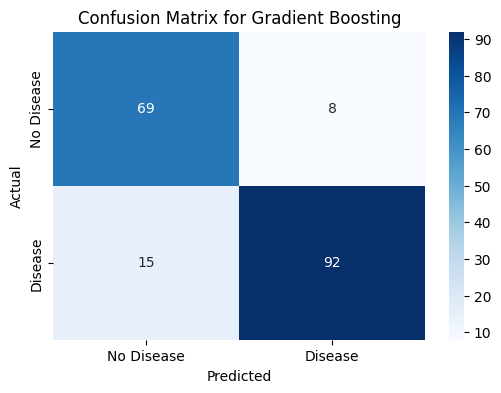

In [48]:
# Compute and print confusion matrix
cm = confusion_matrix(y_test, gb_model_pred)
print(f"Confusion Matrix:\n{cm}")
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

In [53]:
xgb_model_pred = xgb_model.predict(X_test)
xgb_model_prob = xgb_model.predict_proba(X_test)[:, 1]

In [54]:
print("XGBoost Performance:")
print("accuracy score: ", accuracy_score(y_test,xgb_model_pred))
print("ROC-AUC: ", roc_auc_score(y_test,xgb_model_prob))

XGBoost Performance:
accuracy score:  0.8695652173913043
ROC-AUC:  0.9366427964558807


Confusion Matrix:
[[69  8]
 [16 91]]


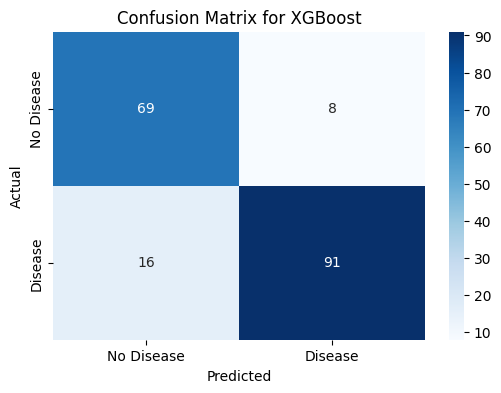

In [55]:
# Compute and print confusion matrix
cm = confusion_matrix(y_test, xgb_model_pred)
print(f"Confusion Matrix:\n{cm}")
    
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for XGBoost')
plt.show()

In [ ]:
'''
random forest Performance:
accuracy score:  0.8804347826086957
ROC-AUC:  0.9370069183153295
'''
# from overall observation random forest model is best

In [56]:
import pickle

model_filename = 'heart.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved as {model_filename}")

Model saved as heart.pkl
